<a href="https://colab.research.google.com/github/chychur/ds-09/blob/main/Neural_network_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural network using Keras

Let's create a neural network using Keras mechanisms that will classify products from the [fasion_mnist dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=ru "fasion_mnist dataset").

Let's define the network architecture. The accuracy of the most naive but adequate neural network is about 91%, so the figure should not be lower. To achieve such values, you need to experiment with the hyperparameters of the network:

* number of layers;

* the number of neurons;

* activation functions;

* number of epochs;

* batch size;

* choice of optimizer;

* various regularization techniques, etc.

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_valid = X_valid.reshape(-1, 784)

In [10]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=[784,]))
model.add(Dropout(0,2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history = model.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=512,
    validation_data=(X_valid, y_valid)
)

Epoch 1/60
108/108 [==============================] - 2s 12ms/step - loss: 0.7174 - accuracy: 0.7593 - val_loss: 0.4651 - val_accuracy: 0.8410
Epoch 2/60
108/108 [==============================] - 1s 10ms/step - loss: 0.4404 - accuracy: 0.8469 - val_loss: 0.4215 - val_accuracy: 0.8544
Epoch 3/60
108/108 [==============================] - 1s 9ms/step - loss: 0.3954 - accuracy: 0.8611 - val_loss: 0.3760 - val_accuracy: 0.8680
Epoch 4/60
108/108 [==============================] - 1s 12ms/step - loss: 0.3660 - accuracy: 0.8707 - val_loss: 0.3928 - val_accuracy: 0.8594
Epoch 5/60
108/108 [==============================] - 2s 15ms/step - loss: 0.3456 - accuracy: 0.8766 - val_loss: 0.3482 - val_accuracy: 0.8748
Epoch 6/60
108/108 [==============================] - 1s 9ms/step - loss: 0.3278 - accuracy: 0.8825 - val_loss: 0.3413 - val_accuracy: 0.8778
Epoch 7/60
108/108 [==============================] - 1s 10ms/step - loss: 0.3132 - accuracy: 0.8873 - val_loss: 0.3268 - val_accuracy: 0.8814
E

In [16]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 112.5208 - accuracy: 0.8538
[112.52079010009766, 0.8537999987602234]


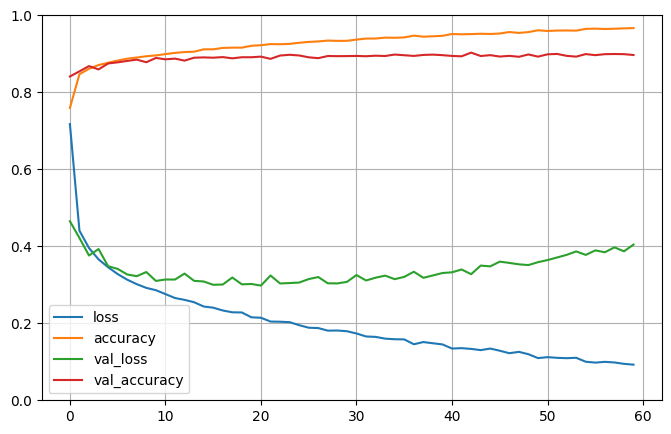

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 1s 2ms/step


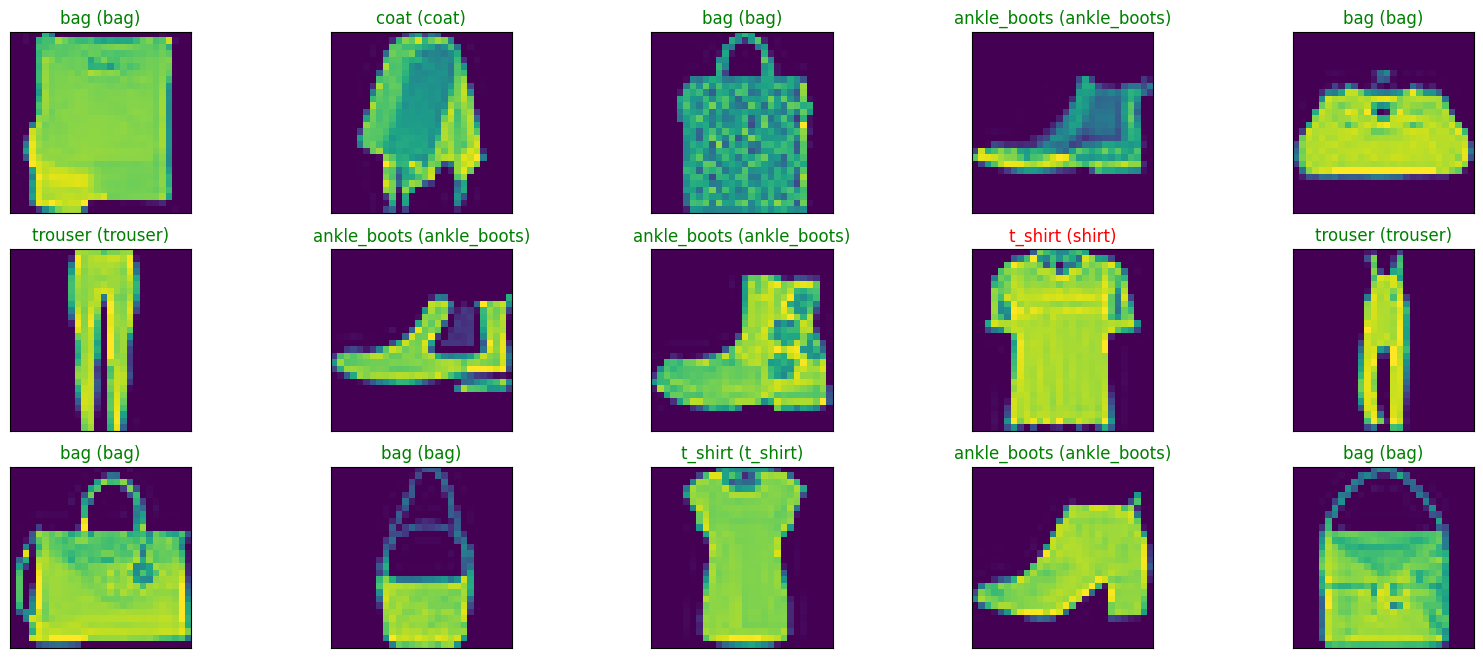

In [18]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)
X_test = X_test.reshape(10000, 28, 28)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))